In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline

In [3]:
#--------------------------------
# Device configuration
#--------------------------------
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


In [4]:
# https://www.aboutdatablog.com/post/how-to-successfully-add-large-data-sets-to-google-drive-and-use-them-in-google-colab
# mounting google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)



Mounted at /content/gdrive


In [ ]:
# unzip files
#!unzip gdrive/My\ Drive/ADM-HW2/datahw1.zip
!unzip gdrive/My\ Drive/ADM-HM2/archive.zip
#!unzip gdrive/My\ Drive/SapienzaColab/ADM_Ass1/datahw1.zip


Archive:  gdrive/My Drive/ADM-HM2/archive.zip
  inflating: instagram_locations.csv  
  inflating: instagram_posts.csv     
  inflating: instagram_profiles.csv  


## *Research Questions*

### Research question 1: EDA
We use the Instagram dataset provided by Kaggle (https://www.kaggle.com/datasets/shmalex/instagram-dataset?select=instagram_profiles.csv). As Kaggle shows, the dataset is collected data from 2019. It provides information of 1 204 583 locations over the world, 4 509 586 different people and business, and 42 710 197 different posts with information about their location, user, date, number of likes, etc.
This information is given in 3 different comma separated files.

* The locations file provides 23 different parameters;
*   The posts file provides 10 different parameters;
*   The profiles file provides 11 different parameters.


In this first research question, we will look into the provided datasets, so we will understand with what data we are working with. 

In [ ]:
# load the datasets
df_locations = pd.read_csv("instagram_locations.csv", delimiter = '\t')
df_locations.head(5)

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [ ]:
df_profiles = pd.read_csv("instagram_profiles.csv", delimiter = '\t')
df_profiles.head(5)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [ ]:
df_posts = pd.read_csv("instagram_posts.csv", delimiter = '\t', nrows = 5000000)
df_posts.head(5)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


In [ ]:
# first we check and remove any duplicates in the dataset
df_locations.drop_duplicates()
df_profiles.drop_duplicates()
df_posts.drop_duplicates()

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0
...,...,...,...,...,...,...,...,...,...,...
2999995,31414319,-1,BuEwr57Bwom,2.289467e+08,5.944980e+08,2019-02-19 20:02:46.000,1,Beating hard on the F1 in 25kts and one crew s...,34,10
2999996,31414320,-1,BuEwdrPhZCm,2.289467e+08,5.944980e+08,2019-02-19 20:00:49.000,1,"Cracking day sailing Sunday past, some great s...",41,3
2999997,31414321,-1,BtqwTa9hG-G,2.289467e+08,5.944980e+08,2019-02-09 17:39:10.000,1,Having a drifting downwind dual with the Starf...,33,1
2999998,31414322,-1,BtqwF_NBNea,2.289467e+08,5.944980e+08,2019-02-09 17:37:20.000,1,Back sailing last Sunday for the 2nd half of A...,24,0


First, we will determine the datatypes of the parameters that are given to us. In our opinion, the datatypes match the description of the given data on Kaggle, so we will not change any of the datatypes.

In [ ]:
print(df_locations.dtypes)
print(df_posts.dtypes)
print(df_profiles.dtypes)

sid                         int64
id                          int64
name                       object
street                     object
zip                        object
city                       object
region                     object
cd                         object
phone                      object
aj_exact_city_match        object
aj_exact_country_match     object
blurb                      object
dir_city_id                object
dir_city_name              object
dir_city_slug              object
dir_country_id             object
dir_country_name           object
lat                       float64
lng                       float64
primary_alias_on_fb        object
slug                       object
website                    object
cts                        object
dtype: object
sid                  int64
sid_profile          int64
post_id             object
profile_id         float64
location_id        float64
cts                 object
post_type            int64
description    

We can get data summaries of the three different datasets by using the describe function. 
This function only gives information based on the numerical data

In [ ]:
df_locations.describe()

,sid,id,lat,lng
count,1.022658e+06,1.022658e+06,1.016495e+06,1.016495e+06
mean,5.274856e+05,3.152851e+14,-1.529215e+01,3.421718e+01
std,2.994567e+05,5.795031e+14,7.615085e+01,2.201081e+01
min,1.000000e+00,7.000000e+00,-1.799830e+02,-9.000000e+01
25%,2.688392e+05,2.522377e+08,-8.015575e+01,2.997555e+01
50%,5.300405e+05,8.573350e+08,-2.450000e+00,4.067820e+01
75%,7.866598e+05,3.304662e+14,3.071740e+01,4.884722e+01
max,1.043657e+06,2.402148e+16,1.799941e+02,8.999870e+01


In [ ]:
df_posts.describe()

,sid,sid_profile,profile_id,location_id,post_type,numbr_likes,number_comments
count,3.000000e+06,3.000000e+06,2.999863e+06,2.996873e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,2.944016e+07,2.333161e+05,3.195472e+09,3.075259e+14,1.061249e+00,2.869894e+02,7.160539e+00
std,2.594281e+06,8.105454e+05,7.357614e+10,5.715731e+14,2.398066e-01,5.560712e+03,1.579671e+02
min,6.025000e+03,-1.000000e+00,3.000000e+00,7.670000e+02,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.903071e+07,-1.000000e+00,2.963938e+08,2.742526e+08,1.000000e+00,1.900000e+01,0.000000e+00
50%,2.983005e+07,-1.000000e+00,1.610783e+09,8.805117e+08,1.000000e+00,4.600000e+01,1.000000e+00
75%,3.062258e+07,-1.000000e+00,5.428964e+09,3.171835e+14,1.000000e+00,1.230000e+02,5.000000e+00
max,3.144308e+07,4.510762e+06,9.001013e+13,1.015016e+16,3.000000e+00,2.212264e+06,1.352210e+05


In [ ]:
df_profiles.describe()

,sid,profile_id,following,followers,n_posts
count,4.509586e+06,4.477139e+06,3.452771e+06,3.452771e+06,3.452771e+06
mean,2.255992e+06,3.083302e+09,1.405641e+03,4.739899e+03,4.095414e+02
std,1.301807e+06,4.266575e+10,8.113473e+03,1.939087e+05,1.041940e+03
min,1.186000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.128596e+06,2.735177e+08,3.560000e+02,1.590000e+02,2.200000e+01
50%,2.255992e+06,1.649248e+09,7.540000e+02,4.060000e+02,1.200000e+02
75%,3.383389e+06,5.514691e+09,1.573000e+03,9.740000e+02,4.200000e+02
max,4.510785e+06,9.001013e+13,4.191080e+06,2.854576e+08,1.837300e+05


Next, we can see how many null values there are present for each dataset per parameter. As visible, there are a lot of null values per parameter. These values do not provide us with any information. Therefore, we have to be careful and remove these values, depending on the type of question.

In [ ]:
df_locations.isnull().sum()

In [ ]:
df_posts.isnull().sum()

In [ ]:
df_profiles.isnull().sum()

Furthermore, we can make correlation plots to see if there is a strong correlation between the parameters in one dataset. 

As shown by the three heatmaps, there is no strong correlation between any parameters within one dataset.

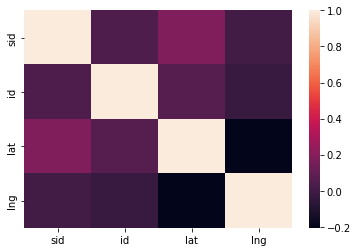

In [ ]:
sns.heatmap(df_locations.corr())
plt.show()


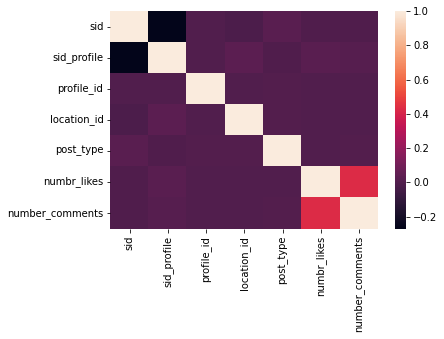

In [ ]:
sns.heatmap(df_posts.corr())
plt.show()


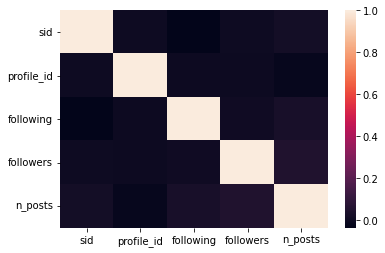

In [ ]:
sns.heatmap(df_profiles.corr())
plt.show()


### Research question 2: Explore dataset

##### **Plot the number of posts for each profile in descending order**

We first removed the rows that contained NaNs so we only use data that is actually available.
The first subplot shows the trend of the top 150, lowest 150, and the total data. As can be seen, there are some profiles with a lot of posts, but it decreases very fast. The lowest 150 profiles have never posted anything.

Afterwards, we decided to also look into the data if we would remove the profiles that do not have any likes to see what influence that would have on the data.


In [ ]:
# remove the rows with nan in n_posts
df_profiles_nposts = df_profiles.dropna( how='any',
                    subset=['n_posts'])

# sort the dataframe based on the nposts
df_profiles_sort = df_profiles_nposts.sort_values(by='n_posts', ascending=False)

In [ ]:
#define subplot layout
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

# plot the highest 150 number of posts
ax1 = df_profiles_sort.iloc[0:150].plot(x='profile_name', y='n_posts', ax=axes[0])
ax1.get_xaxis().set_visible(False)
ax1.title.set_text('150 highest number of posts')

# plot the lowest 150 number of posts
ax2 = df_profiles_sort.iloc[-150:].plot(x='profile_name', y='n_posts', ax=axes[1])
ax2.get_xaxis().set_visible(False)
ax2.title.set_text('150 lowest number of posts')

# plot for every profile
ax3 = df_profiles_sort.plot(x='profile_name', y='n_posts', ax=axes[2])
ax3.get_xaxis().set_visible(False)
ax3.title.set_text('All profiles')

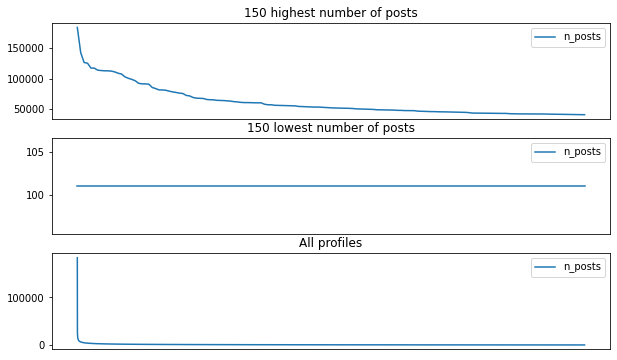

In [ ]:
# remove profiles with 0 posts
df_profiles_sort = df_profiles_sort.loc[~((df_profiles_sort['n_posts'] == 0))]

#define subplot layout
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

# plot the highest 150 number of posts
ax1 = df_profiles_sort.iloc[0:150].plot(x='profile_name', y='n_posts', ax=axes[0])
ax1.get_xaxis().set_visible(False)
ax1.title.set_text('150 highest number of posts')

# plot the lowest 150 number of posts
ax2 = df_profiles_sort.iloc[-150:].plot(x='profile_name', y='n_posts', ax=axes[1])
ax2.get_xaxis().set_visible(False)
ax2.title.set_text('150 lowest number of posts')

# plot for every profile
ax3 = df_profiles_sort.plot(x='profile_name', y='n_posts', ax=axes[2])
ax3.get_xaxis().set_visible(False)
ax3.title.set_text('All profiles')

##### **What posts have the highest number of "likes"?**
To answer this question, we only load in certain columns of the posts data set, namely the post id, the number of likes, and the number of comments. The id post can be tracked back to the specific post. As we can see, the highest number of likes also has a lot of comments, but it does not necessarily mean the highest number of comments. It does make sense that it also has a lot of comments, since a lot of people have seen the post (which can be concluded from the fact that it has so many likes). 



In [ ]:
df_small_posts = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_id','numbr_likes', 'number_comments'], low_memory = True)


In [ ]:
# Sort the posts_dataframe based on the number of likes
df_posts_sorted = df_small_posts.sort_values(by='numbr_likes', ascending=False)

# Show top 10
print("These are the first 10 post with the highest number of likes:   ")
df_posts_sorted.head(10)


These are the first 10 post with the highest number of likes:   


,post_id,numbr_likes,number_comments
19624085,Bt3yaXmAM0d,8822952.0,165886.0
19623988,BuwffB7g8cK,5447066.0,25303.0
19624082,Buc1gyZAaMQ,5116398.0,40608.0
19623986,BvcukE8AMuG,4271466.0,30770.0
39701024,BqSLFVBFLfq,4264745.0,18691.0
6293907,BwTSXBKg7gN,3586546.0,15405.0
19624086,Btw8pFXAvQm,3558599.0,15715.0
19802016,BvC3n6_gqin,3533326.0,59475.0
30850564,Bw7vqLrFkHi,3340297.0,149489.0
39812576,Bw2gTH1AiDA,3311246.0,64318.0


##### **What posts have the most and the least number of comments?**
For this question we use the same dataset as used above. As we can see, the post with the highest number of comments, has way less likes than comments. This could be due to the fact that some people have responded multiple times or that it was a controversial post where people felt the need to comment, but not like. However, we are not sure if it is either of these conclusions, since we do not have any data about if people have responded multiple times or not. 

If we look at the 10 posts with the least amount of comments, we see that these are posts where no one has placed a comment. They still received likes, however, so people did see the post. They just did not feel the need to leave a comment.

In [ ]:
# remove the NAN
df_small_posts = df_small_posts.dropna( how='any',
                    subset=['number_comments'])

# sort the dataframe based on the number of comments
df_posts_sorted = df_small_posts.sort_values(by='number_comments', ascending=False)

In [ ]:
# Show first 10
print("These are the first 10 posts with the most comments:   ")
df_posts_sorted.head(10)

These are the first 10 posts with the most comments:   


,post_id,numbr_likes,number_comments
41873060,Bx2sPAjHviO,38871.0,488953.0
12164781,BuGjhWAhAW5,81523.0,313997.0
33261751,BJ-rkpTgn1N,54507.0,257488.0
11149127,BMtisIxjhtT,331703.0,214365.0
9383817,BzOOWj3DfZK,23515.0,189888.0
5427268,BoQoM-JFkPA,129258.0,180635.0
25257169,Bwarws1lCok,684861.0,173988.0
6220011,Bt4qlVDAZMH,2224495.0,170836.0
31689573,Bs9NhQkAcJA,226336.0,166919.0
14257307,Bzqb95QI_1E,169791.0,166198.0


In [ ]:
# Show least 10
print("These are the least 10 posts with the least comments:   ")
df_posts_sorted.tail(10)

These are the least 10 posts with the least comments:   


,post_id,numbr_likes,number_comments
10727132,Bx5XAzDHUe7,36.0,0.0
29592201,BxIenYFnmAu,17.0,0.0
29592204,Bw69L_ollho,9.0,0.0
29592205,Bw5K1oGjIK4,1120.0,0.0
10727121,BzQkgAUpp-y,83.0,0.0
10727119,BohcyBgFtD6,16.0,0.0
10727117,BqEZ-DRFCy8,29.0,0.0
10727106,BzaQtxKJPci,31.0,0.0
10727103,BzdFSh-nONl,5.0,0.0
0,BXdjjUlgcgq,80.0,0.0


##### **How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.**
To answer this question, we only need the column with the location id, since this column shows if (and what) location is tagged in a post. To visualise how many posts have a tagged location, we have chosen a pie chart, where the percentages of both categories are also displayed.

As we can see, approximately 70% of the posts have a tagged location. It makes sense that the number of posts with a tagged location is higher than without a tagged location, because you can engage your followers more with what you do. Especially if you are a business.

In [ ]:
posts = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['location_id'], low_memory = True)

#Counts all the posts without location
n_no_location = posts['location_id'].isnull().sum()
#Counts all the post with location
n_location = posts['location_id'].count()


The number of posts with location is:    29737425
The number of posts without location is:    12972772


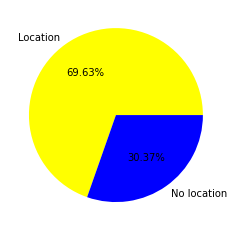

In [ ]:
print("The number of posts with location is:   ", n_location)
print("The number of posts without location is:   ", n_no_location)

# Create data
size_of_groups=[n_location, n_no_location]

# Create a pieplot
plt.pie(size_of_groups, labels=['Location', 'No location'], colors=['yellow', 'blue'], autopct='%1.2f%%')

plt.show()

##### **How many posts include only photos? How many also have videos?**
For this question, we use the parameter 'post_type' of the posts dataset. A pie chart is created to visualize the number of posts with photos, videos or both. 

The pie chart shows that more than 95% of the posts contain only a picture, approximately 3% shows a video, and 0.1% of the posts have both. 

In [ ]:
# load in the data
posts_type = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_type'], low_memory = True)

Number of posts with only photos:   41534486
Number of posts with only videos:   1134768
Number of posts with photos and videos:   40943


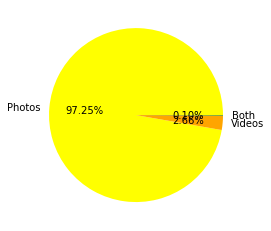

In [ ]:
# We decided the name "test" with "posts" because it's more understandable
post_photo = posts_type["post_type"].value_counts()[1]
post_video = posts_type["post_type"].value_counts()[2]
post_both = posts_type["post_type"].value_counts()[3]

print("Number of posts with only photos:  ", post_photo)
print("Number of posts with only videos:  ", post_video)
print("Number of posts with photos and videos:  ", post_both)

# Create data
size_of_groups=[post_photo, post_video,post_both]

# Create a pieplot
plt.pie(size_of_groups, labels=['Photos', 'Videos', 'Both'], colors=['yellow', 'orange', 'green'], autopct='%1.2f%%')

plt.show()

##### **What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?**

From the code, we can see that approximately 75% of the accounts are non-business accounts. We can interpret from this that most instagram users use it for private use instead for a business.

In [ ]:
# first remove the rows without any info
df_profiles_business = df_profiles.dropna( how='any',
                    subset=['is_business_account'])

In [ ]:
# calculate the percentages
df_profiles_business['is_business_account'].value_counts(normalize=True)


False    0.751764
True     0.248236
Name: is_business_account, dtype: float64

### Research question 3:  most common time in which users publish their posts

##### **What is the most common time in which users publish their posts?**
For this question, we will need to look at the cts which represents the time a post is published. To answer this question, we will convert the cts to hours, minutes, and seconds so we can see what is the most populair time to post a post. If we look at does three aspects, we see that the most common time to post is 21:00:09.

In [ ]:
# load in data
posts = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['cts'], low_memory = True)


In [ ]:

#Takes only the date_time column and extrapolate only hours_minutes_seconds
posts['cts'] = pd.to_datetime(posts['cts'], unit='ns').dt.time

best_time = posts['cts'].value_counts()[0]
c=0

for values in posts['cts'].value_counts():
  if values == best_time:
    c+=1

best_times = posts['cts'].value_counts().head(c).index.tolist()
if c==1:
  print("This is the most common time in which users publish their posts:  ")
else:
  print("Those are the most common times in which users publish their posts:  ")

for x in best_times:
  print (x)


This is the most common time in which users publish their posts:  
21:00:09


#### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [5]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

def post_per_interval(interval, posts):

  times = pd.to_datetime(posts['cts'], unit='ns')

  times = pd.DataFrame(times)
  times.set_index(pd.DatetimeIndex(times),inplace=True)

  value_counts=pd.DataFrame()
  
  for i in interval:
    start,end = i
    total = times.between_time(start,end).count()
    total = int(total[0])
    results = pd.DataFrame({'Time interval' : [i], 'Total posts' : total})
    value_counts = value_counts.append(results)

  value_counts.reset_index(drop = True, inplace = True)
  print(value_counts)

  f = plt.figure()
  ax = value_counts.plot(figsize=(15,8), kind='bar', color = "green", zorder=3)
  plt.setp(ax, xlabel='Time Intervals', ylabel='Number of posts', title = 'Number of posts for each time interval')
  plt.show()
  return

#### Use the function that you created in the previous literal to plot the number of posts between the following time intervals:

(Initial time, 	Final time) :
(06:00:00, 10:59:59)
(11:00:00, 13:59:59)
(14:00:00, 16:59:59)
(17:00:00, 19:59:59)
(20:00:00, 23:59:59)
(00:00:00, 02:59:59)
(03:00:00, 05:59:59)

For this question, we will load in the cts and convert this using the function. After that, we will check what post falls in which interval.

As we can see, most posts are posted between 20 and 24. In our opinion this makes sense, since most accounts are non-business accounts and this is after office hours. That is the moment people have time to look at instagram and post new posts. The least 'popular' time interval is between 03 - 06, which can be explained by the fact that most people are sleeping in this time interval. 

In [ ]:
# load in data
posts = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['profile_id','cts'], low_memory = True)

In [6]:
interval = [('06:00:00', '10:59:59'),
('11:00:00', '13:59:59'),
('14:00:00', '16:59:59'),
('17:00:00', '19:59:59'),
('20:00:00', '23:59:59'),
('00:00:00', '02:59:59'),
('03:00:00', '05:59:59')]

          Time interval  Total posts
0  (06:00:00, 10:59:59)        29067
1  (11:00:00, 13:59:59)        25720
2  (14:00:00, 16:59:59)        31735
3  (17:00:00, 19:59:59)        35306
4  (20:00:00, 23:59:59)        41501
5  (00:00:00, 02:59:59)        19897
6  (03:00:00, 05:59:59)        16774


<Figure size 432x288 with 0 Axes>

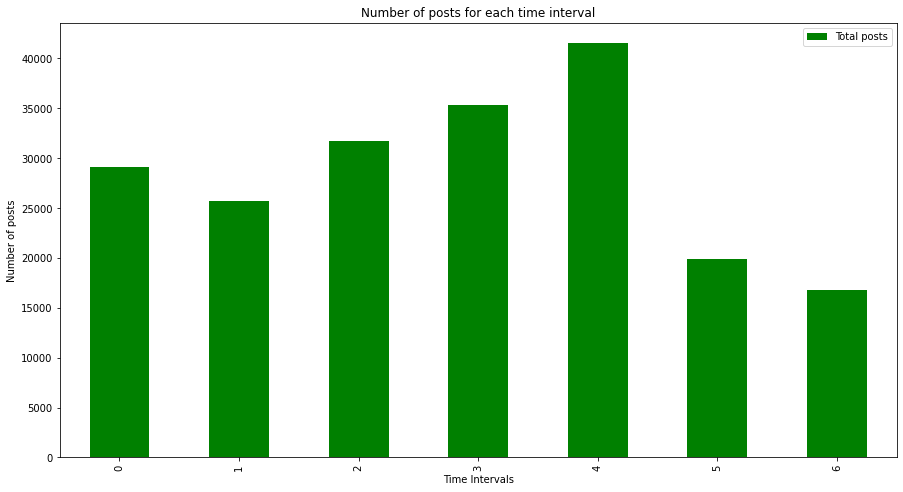

In [ ]:
posts = pd.read_csv("instagram_posts.csv", delimiter='\t', nrows = 200000)

post_per_interval(interval, posts)

### Research question 4: in most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

##### **Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.**
For this question, we need the post id, the profile id, the number of likes, and the number of comments. The profile id is needed to filter on a certain profile. The post id is necessary so the post can be traced back. The number of likes and comments give an idea of the post and its popularity to give a quick view. 

In [7]:
posts = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_id', 'profile_id', 'numbr_likes', 'number_comments','cts'], low_memory = True)

In [8]:
def find_post_by_profileID(profileID):  
  return(posts.loc[posts['profile_id'] == profileID])


In [ ]:
#Example : 2237947779
#The profile_id in the table shown below is written in a compact form,
#the real form is the one shown in the row up this
profileID = float(input("Please insert a profile_id:  "))
find_post_by_profileID(profileID)

Please insert a profile_id:  2237947779


,post_id,profile_id,numbr_likes,number_comments
0,BXdjjUlgcgq,2.237948e+09,80.0,0.0
773482,BeyPed5hKj9,2.237948e+09,86.0,2.0
2868573,Bunhd1DFVAG,2.237948e+09,168.0,3.0
2868706,Bppi85gliQK,2.237948e+09,102.0,2.0
3730200,BuDfIyslzfw,2.237948e+09,145.0,2.0
29715661,BxJsMDpA2yH,2.237948e+09,124.0,2.0
29715667,Bt5LFpZlm3z,2.237948e+09,150.0,3.0
29715668,BxZIzaQhS-o,2.237948e+09,166.0,2.0
29715669,BxRZvS0gPIA,2.237948e+09,220.0,9.0
29715769,BwygkNCAShv,2.237948e+09,198.0,2.0


##### **Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.**
First, we will sort the profiles on the number of posts. After that, we will loop over the given number and run the 'find_post_by_profileID' function that is programmed in the previous question. This will give the posts of the top n popular profiles based on their number of posts. 

In [ ]:
profiles = pd.read_csv('instagram_profiles.csv', delimiter='\t')
df_profiles_sorted_by_n_posts = profiles.sort_values(by='n_posts', ascending=False)

def posts_of_topN(n):
  top_n = df_profiles_sorted_by_n_posts.head(n)
  for i in range(n):
    find_post_by_profileID(top_n.iloc[i].profile_id)
  return

n = int(input("Insert an integer number:  "))
posts_of_topN(n)


Insert an integer number:  3


##### **What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?**

In [ ]:
# load in the data
profiles = pd.read_csv('instagram_profiles.csv', delimiter='\t')
# sort on the number of posts
df_profiles_sorted_by_n_posts = profiles.sort_values(by='n_posts', ascending=False)
# print the top 10
top_10 = df_profiles_sorted_by_n_posts.head(10)

# loop over the top 10
for i in range(10):
  post_i = find_post_by_profileID(top_10.iloc[i].profile_id)
  user = top_10.iloc[i].profile_name
  # determine average likes
  avg_likes_i = post_i['numbr_likes'].mean()
  # determine average number of comments
  avg_comments_i = post_i['number_comments'].mean()
  print("The average of likes of user ",user, " is: ", avg_likes_i)
  print("The average of comments of user ",user, " is: ", avg_comments_i)
  print("\n")


The average of likes of user  jasem33312  is:  7.666666666666667
The average of comments of user  jasem33312  is:  0.0


The average of likes of user  koenigpic  is:  0.0
The average of comments of user  koenigpic  is:  0.0


The average of likes of user  rudyanto62  is:  2.96
The average of comments of user  rudyanto62  is:  0.04


The average of likes of user  hometown_ni  is:  0.2962962962962963
The average of comments of user  hometown_ni  is:  0.0


The average of likes of user  dwfitfiber_thailand  is:  1.5405405405405406
The average of comments of user  dwfitfiber_thailand  is:  0.0


The average of likes of user  waxking911  is:  2.026315789473684
The average of comments of user  waxking911  is:  0.18421052631578946


The average of likes of user  gamt_official  is:  6.477611940298507
The average of comments of user  gamt_official  is:  0.04477611940298507


The average of likes of user  collarosedw_official  is:  0.4
The average of comments of user  collarosedw_official  is:  

##### **Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.**


          Time interval  Total posts
0  (06:00:00, 10:59:59)           44
1  (11:00:00, 13:59:59)           14
2  (14:00:00, 16:59:59)           17
3  (17:00:00, 19:59:59)           11
4  (20:00:00, 23:59:59)           10
5  (00:00:00, 02:59:59)           25
6  (03:00:00, 05:59:59)           41


<Figure size 432x288 with 0 Axes>

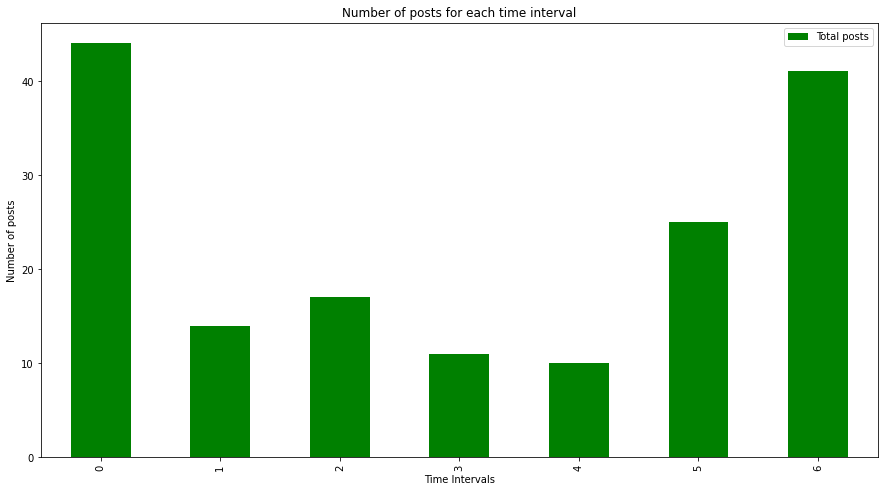

In [9]:
profiles = pd.read_csv('instagram_profiles.csv', delimiter='\t')
df_profiles_sorted_by_n_posts = profiles.sort_values(by='n_posts', ascending=False)
top_10 = df_profiles_sorted_by_n_posts.head(10)

posts_top10 = pd.DataFrame()

#We know that the problem requires the plot of 10 profiles,
#but our hardware does not allow us to do this becasue we constantly ran out of memory. 
for x in range(5):
  post_x = find_post_by_profileID(top_10.iloc[x].profile_id)
  posts_top10=posts_top10.append(post_x)

post_per_interval(interval, posts_top10)

### Research question 5: most influencial users

##### **Plot the top 10 most popular users in terms of followers and their number of posts.**

First the rows with no information for both the followers and the nr of posts are deleted. After the data cleaning, the data is sorted based on the followers or on the number of posts, and two bar plots are created.

As can be seen, instagram has the most followers, while jasem33312 has the most posts. Furthermore, it is also visible that there is no overlap between the users with the most followers and the users with the most posts. 

Lastly, we have also created a plot for the users with the most followers, where the number of followers are displayed on the y-axis and the number of posts are displayed on the x-axis. It shows that there is no real correlation between the number of posts and number of followers. This is only based on 10 datapoints, so we cannot conclude this for sure.

In [ ]:
# delete the rows if there is nothing now about followers
df_profiles_followers = df_profiles.dropna( how='any',
                    subset=['followers'])

# sort the dataframe based on the nposts
df_profiles_foll_sort = df_profiles_followers.sort_values(by='followers', ascending=False)

# Show first 10
df_profiles_foll_sort.head(10)

# Print the number of followers

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
2785241,3437294,4.968651e+08,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,2.341008e+07,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,2.423993e+07,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,5.041706e+07,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
1703764,3513205,9.070254e+08,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


In [ ]:
# delete the rows if there is nothing now about n_posts
df_profiles_posts = df_profiles.dropna( how='any',
                    subset=['n_posts'])

# sort the dataframe based on the nposts
df_profiles_posts_sort = df_profiles_followers.sort_values(by='n_posts', ascending=False)

# Show first 10
df_profiles_posts_sort.head(10) 

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
2207897,345591,1.087614e+09,waxking911,Frank Hernandez,NaN,134.0,138.0,117099.0,NaN,NaN,False
4313908,3944512,1.603890e+09,gamt_official,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่งของแท้💯 มีโปร1290 พร้อมซอง...,7470.0,36001.0,113780.0,bit.ly/2GdIYJl,2019-07-14 21:10:30.785 -0400,True
4219476,3851808,2.181730e+08,collarosedw_official,grapeseed+collarose,🍇 สินค้าแบรนด์ dwplus\n💓 collarose+grapeseed+f...,7496.0,18021.0,113182.0,bit.ly/2asesw7,2019-07-13 02:08:17.407 -0400,True
4236057,3868432,2.855497e+08,gamt_authentic,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่ง มีโปร1290 พร้อมซองแว่น+ผ้...,7480.0,27511.0,112777.0,bit.ly/2T2RIqG,2019-07-13 09:28:30.025 -0400,True
1631526,1312725,8.312603e+09,ivankkkka.trmp,IVANKA DARCEY K. TRUMP,DORA. 👄 #Mango,7497.0,2.0,112723.0,www.flightclub.com/yeezy,2019-04-01 02:41:26.980 -0400,False


[Text(0.5, 0, '')]

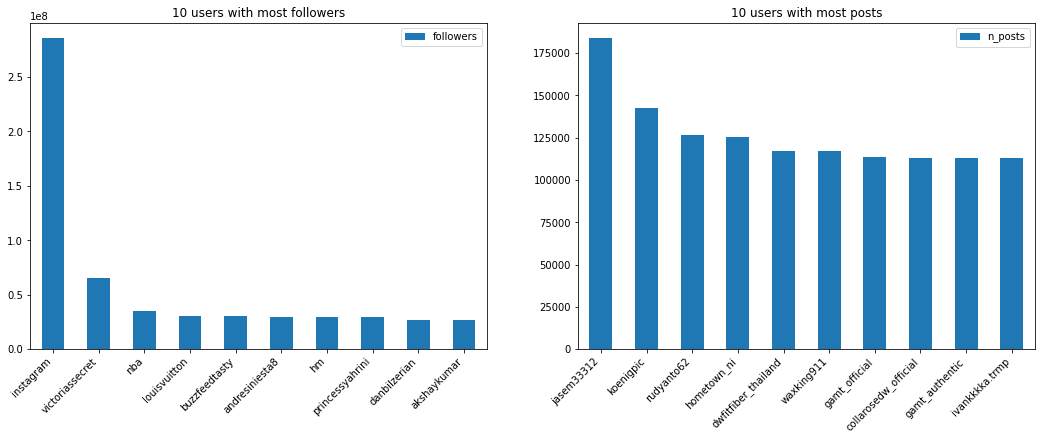

In [ ]:
# plot the top 10 of followers and nr posts
#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# plot the highest top 10 followers
ax1 = df_profiles_foll_sort.iloc[0:10].plot.bar(x='profile_name', y='followers', ax=axes[0])
ax1.title.set_text('10 users with most followers')
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')
ax1.set(xlabel=None)


# plot the top 10 posts
ax2 = df_profiles_posts_sort.iloc[0:10].plot.bar(x='profile_name', y='n_posts', ax=axes[1])
ax2.title.set_text('10 users with most posts')
plt.sca(axes[1])
plt.xticks(rotation=45, ha='right')
ax2.set(xlabel=None)

<Figure size 432x288 with 0 Axes>

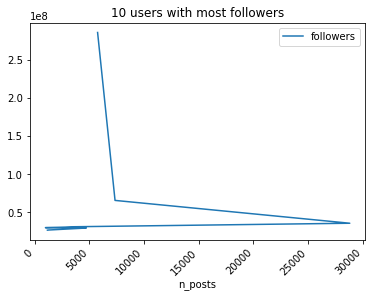

In [ ]:
# plot the highest top 10 followers
fig = plt.figure()
ax1 = df_profiles_foll_sort.iloc[0:10].plot(x='n_posts', y='followers')
ax1.title.set_text('10 users with most followers against their number of followers')
plt.xticks(rotation=45, ha='right')
plt.show()

##### **Who is the most influential user?**
It depends on the definition of influential. If the definition of influential means who will reach the most people, the most influential user is Instagram.

##### **Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.**

Based on the data, 95.6% of their posts have a tagged location. If we look at the locations of these posts (see the bar chart), we see that only one city is tagged twice, while all the other cities are tagged only once.






In [ ]:
df_instagram = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['sid_profile','location_id','post_type'], low_memory = True)


In [ ]:
# sid nr of instgram
profileNr = 336492

# make a new datagram based on the posts of instagram
df_instagram = df_instagram[df_instagram.sid_profile == profileNr]


In [ ]:
# determine how big percentage they have posted with tagged locations
perc = (len(df_instagram)-df_instagram['location_id'].isna().sum())/len(df_instagram)*100
print('Percentage of posts with tagged location:', perc, '%')

Percentage of posts with tagged location: 95.65217391304348 %


In [ ]:
# remove the posts without a tagged location
df_instagram = df_instagram.dropna( how='any', subset = ['location_id'])


In [ ]:
# load information of locations
df_locations_small = pd.read_csv('instagram_locations.csv', delimiter="\t", usecols = ['id','city', 'dir_country_name'], low_memory = True)


In [ ]:
# combine the instagram and location df based on sid number
df_combined = pd.merge(df_instagram, df_locations_small, left_on='location_id', right_on = 'id', how="left")

In [ ]:
# check if dataset makes sense
print(df_combined.shape)
df_combined.head(5)

(44, 6)


,sid_profile,location_id,post_type,id,city,dir_country_name
0,336492,5.332856e+06,1,5332856,"Dallas, Texas",United States
1,336492,5.873874e+08,1,587387369,NaN,NaN
2,336492,8.770667e+14,1,877066659067597,"Cusco, Peru",Peru
3,336492,3.500213e+08,1,350021298,"Stony Plain, Alberta",NaN
4,336492,5.243120e+08,1,524311966,Forres,NaN


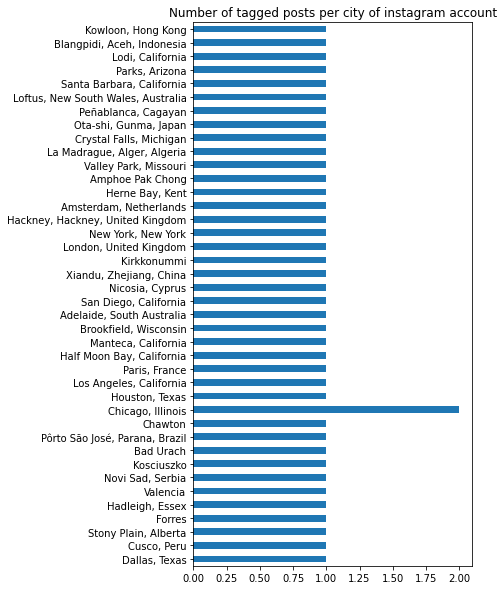

In [ ]:
plt.figure(figsize=(5, 10))
df_combined['city'].value_counts(sort=False).plot.barh()
plt.title('Number of tagged posts per city of instagram account')
plt.show()


##### **How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.**

93% of their posts contain a picture. 7% of their posts contain a video. No posts contain both. It looks like instagram mainly likes to post posts with only pictures. 

([<matplotlib.patches.Wedge at 0x7fa8517b8d50>,
 [Text(-1.0769925073829814, 0.2238015617481677, 'Photo'),
  Text(1.0769925178598874, -0.22380151133050968, 'Video'),
  Text(1.0999999999999954, 1.0298943244593887e-07, 'Both')],
 [Text(-0.5874504585725352, 0.1220735791353642, '93%'),
  Text(0.5874504642872113, -0.12207355163482345, '7%'),
  Text(0.5999999999999974, 5.6176054061421195e-08, '0%')])

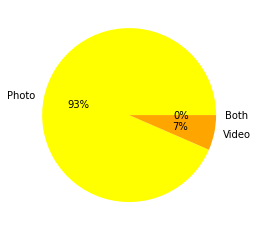

In [ ]:
# Group by post_type
type1 = (df_instagram['post_type']==1).sum()
type2 = (df_instagram['post_type']==2).sum()
type3 = (df_instagram['post_type']==3).sum()


# Create data
size_of_groups=[type1, type2, type3]

# Create a pieplot
plt.pie(size_of_groups, labels=['Photo', 'Video', 'Both'], colors=['yellow', 'orange', 'red'], autopct='%1.2f%%')

##### **How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.**

If we only look at the average number of likes and comments, we can see that likes are a 100 times more placed than comments for the profile. This can be explained by the fact that a like is a very easy action to perform in comparison with leaving a comment. If we compare the number of likes and comments for pictures vs videos, we can see that pictures receive both more likes and comments. This can be explained by the fact that a lot of people do not take the time to completely watch a video when they scroll through instagram. 

If we compare the numbers with the number of followers (285 457 645), we see that less than 1% of the followers leave a like, and even a smaller amount leaves a comment. Even though the number of likes on itself seems a lot, compared to the number of followers it is very low.

In [ ]:
nrfollowers = df_profiles.loc[df_profiles['profile_id'] == 25025320.0, 'followers'].iloc[0]

print('number of followers of instagram:', nrfollowers)

df_inst_photos = df_instagram[df_instagram.post_type == 1]
df_inst_videos = df_instagram[df_instagram.post_type == 2]

photolikes = df_inst_photos['numbr_likes'].mean()
photocomments = df_inst_photos['number_comments'].mean()
videolikes = df_inst_videos['numbr_likes'].mean()
videocomments = df_inst_videos['number_comments'].mean()


dataset = {'medium': ['pictures', 'videos', 'mixed'], 
        'nr likes': [photolikes, videolikes , '-'],
        'likes/followers': [photolikes/nrfollowers, videolikes/nrfollowers , '-'], 
        'nr comments': [photocomments , videocomments , '-'],
        ' comments/followers': [photocomments/nrfollowers, videocomments/nrfollowers , '-']}
df_likes = pd.DataFrame(data=dataset)
df_likes

number of followers of instagram: 285457645.0


,medium,nr likes,likes/followers,nr comments,comments/followers
0,pictures,905933.451613,0.003174,6703.290323,0.000023
1,videos,593409.666667,0.002079,5749.333333,0.00002
2,mixed,-,-,-,-


### Research question 6: user posting effectiveness

##### **What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.**

The average time that a user waits before posting a new post is 32 days 07:23:38.337708570.

If we look at the three accounts that have the smallest time between posts, we see that two of the three accounts follow more people than they have followers.

In [ ]:
# load in data
df_posts_small = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['sid_profile','cts'], low_memory = True)


In [ ]:
# change the cts to times
df_posts_small['cts'] = pd.to_datetime(df_posts_small['cts'], unit='ns')



In [ ]:
# sort the values both on the sid and the cts so that the sids are grouped together and the cts are in order
df_sorted_posts = df_posts_small.sort_values(['sid_profile','cts'])
# remove the users that have only posted once
df_sorted_posts = df_sorted_posts[df_sorted_posts.groupby('sid_profile').sid_profile.transform('count') > 1]


42710197
42610137


In [ ]:
# determine the interval between the times
df_sorted_posts['Time_diff'] = df_sorted_posts['cts'].diff()
df_sorted_posts.head(5)

,sid_profile,cts,Time_diff
35149671,-1,2010-07-19 01:12:23,NaT
4225968,-1,2010-08-21 06:40:27,33 days 05:28:04
1939650,-1,2010-09-05 21:48:24,15 days 15:07:57
39517938,-1,2010-09-06 18:36:05,0 days 20:47:41
35207772,-1,2010-10-15 00:48:15,38 days 06:12:10


In [ ]:
# Remove the first row of every new profile so we only keep the differences for the same profile
df_cleaned = df_sorted_posts[df_sorted_posts.Time_diff > pd.Timedelta(0)]


In [ ]:
# determine the mean of the time difference
df_time_diff = df_cleaned.groupby('sid_profile', as_index=False)['Time_diff'].mean()

print('The average time that a user waits before posting a new post is', df_time_diff['Time_diff'].mean())
df_time_diff

The average time that a user waits before posting a new post is 29 days 03:21:47.309517514


,sid_profile,Time_diff
0,-1,0 days 00:00:27.289843250
1,1186,18 days 04:34:02.628571428
2,1187,14 days 15:43:24.950000
3,1188,34 days 20:52:37.285714285
4,1189,3 days 19:54:01
...,...,...
2178040,4510781,5 days 12:49:08.619047619
2178041,4510782,74 days 15:48:54
2178042,4510783,6 days 05:26:44.818181818
2178043,4510784,5 days 14:12:25.047619047


In [ ]:
# find the three users that post the most frequently
df_time_diff = df_time_diff.sort_values(by=['Time_diff'], ascending = True)

In [ ]:
# only keep three top rows
df_top3 = df_time_diff.iloc[:3]

In [ ]:
# load in the number of followers and following
df_profiles_small = pd.read_csv('instagram_profiles.csv', delimiter="\t", usecols = ['sid','followers', 'following'], low_memory = True)


In [ ]:
# find the number of followers and the following or the top three and plot the dataset
df_top3_combined = df_top3.merge(df_profiles_small, how = 'left',  left_on='sid_profile', right_on='sid')
df_top3_combined.head()

,sid_profile,Time_diff,sid,following,followers
0,3015220,0 days 00:00:01,3015220,35.0,4.0
1,130281,0 days 00:00:01,130281,25.0,47.0
2,2838569,0 days 00:00:01,2838569,395.0,82.0


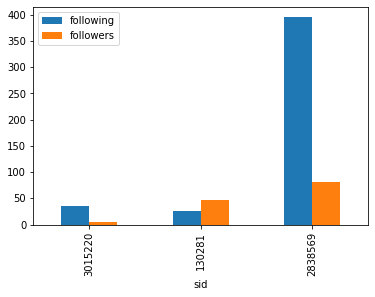

In [ ]:
# plot the following and followers in a chart
# plotting graph
df_top3_combined.plot(x="sid", y=["following", "followers"], kind="bar")

##### **Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.**
The highest average number of likes  is from the profile, with profile sid 531404. They have posted several posts with in general not so much time in between.

The profile with on average the highest number of comments is user 468168, which has posted 2 posts in total with approximately 151 days in between the two posts.

In [ ]:
# load in data
df_posts_small = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['sid_profile','cts', 'numbr_likes', 'number_comments'], low_memory = True)


In [ ]:
# change the cts to times
df_posts_small['cts'] = pd.to_datetime(df_posts_small['cts'], unit='ns')

# sort the values both on the sid and the cts so that the sids are grouped together and the cts are in order
df_sorted_posts = df_posts_small.sort_values(['sid_profile','cts'])
# remove the users that have only posted once
df_sorted_posts = df_sorted_posts[df_sorted_posts.groupby('sid_profile').sid_profile.transform('count') > 1]

# determine the interval between the times
df_sorted_posts['Time_diff'] = df_sorted_posts['cts'].diff()

# Remove the first row of every new profile so we only keep the differences for the same profile
df_cleaned = df_sorted_posts[df_sorted_posts.Time_diff > pd.Timedelta(0)]


In [ ]:
# determine the sid number with highest number of likes and comments
sid_nrlikes = df_cleaned.groupby('sid_profile', as_index=False)['numbr_likes'].mean()
sid_nrcomments = df_cleaned.groupby('sid_profile', as_index=False)['number_comments'].mean()


In [ ]:
sid_nrlikes.loc[sid_nrlikes['numbr_likes'] == sid_nrlikes['numbr_likes'].max()]


,sid_profile,numbr_likes
243730,531404,3528630.5


In [ ]:
sid_nrcomments.loc[sid_nrcomments['number_comments'] == sid_nrcomments['number_comments'].max()]


,sid_profile,number_comments
230742,468168,170836.0


In [ ]:
# make df only for sid_nrlikes and sid_nrcomments
df_likes = df_cleaned[df_cleaned.sid_profile == 531404]
df_comments = df_cleaned[df_cleaned.sid_profile == 468168]

In [ ]:
df_comments

,sid_profile,cts,numbr_likes,number_comments,Time_diff
6220011,468168,2019-02-15 03:18:33,2224495.0,170836.0,151 days 02:58:28


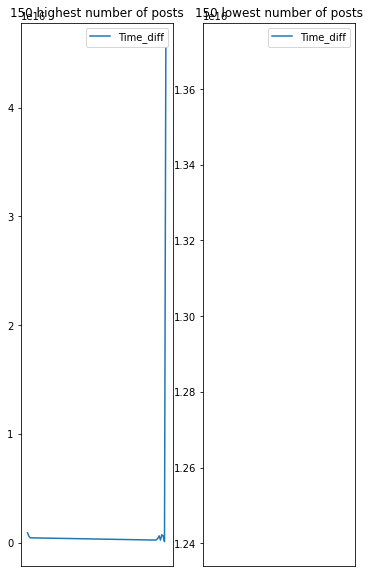

In [ ]:
# plot the difference in times for profile with the highest number of likes and highest number of comments
#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 10))

# plot the highest 150 number of posts
ax1 = df_likes.iloc[0:150].plot( y='Time_diff', ax=axes[0])
ax1.get_xaxis().set_visible(False)
ax1.title.set_text('150 highest number of posts')

# plot the lowest 150 number of posts
ax2 = df_comments.iloc[-150:].plot(y='Time_diff', ax=axes[1])
ax2.get_xaxis().set_visible(False)
ax2.title.set_text('150 lowest number of posts')


### Research question 7: calculating probabilities

##### **What's the probability that a post receives more than 20% "likes" of the number of followers a user has?**
The probability is approximately 6%.

In [ ]:
# first half of set
df_small_posts1 = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['profile_id','numbr_likes'], low_memory = True, nrows = 8500000)
df_small_profiles = pd.read_csv('instagram_profiles.csv', delimiter="\t", usecols = ['profile_id','followers'], low_memory = True)

In [ ]:
# combine the posts and followers into one dataframe
df_combined_small = pd.merge(df_small_posts1, df_small_profiles, on="profile_id", how="left")

# remove any nans
df_combined_small = df_combined_small.dropna( how='any')


In [ ]:
# add extra column (nrlikes/ followers)
df_combined_small["perc_likes"] = (df_combined_small["numbr_likes"] / df_combined_small["followers"])*100

In [ ]:
# see how many posts have more than 20% of the number of followers
count = df_combined_small["perc_likes"][df_combined_small["perc_likes"] > 20].count()

# determine probability
print('The probability that a post receives more than 20% likes of the number of followers is', (count/len(df_combined_small))*100,'%')

The probability that a post receives more than 20% likes of the number of followers is 6.308404401687083 %


##### **Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.**
A user returns to a site when the location is tagged more than once. To determine the probability that a user will return to a previous location, we will first group the posts on the user and on the location and count how many times a certain user has visited a location. Since the change of returning will be different for every user, we will determine an average probability of return with a 95% confidence interval. This is done by looping through the list of users and their locations and determining the probability of return per user.

This results in a probability of return of 24.63 % with a 95% confidence interval of 24.6% - 24.67%.
In our opinion this makes sense, since a lot of the accounts are non-business accounts. These are people that want to show what they are doing and were they are going, especially if they are going to new places. We did expect to have a bigger confidence interval for the locations, since there are both business and non-business account. However, there are so many accounts that the confidence interval will be lower. 

In [ ]:
# load in data
df_posts_small = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['sid_profile','location_id'], low_memory = True)


In [ ]:
# group by the profile id and the location id to see how many users go to what location
df_sorted = df_posts_small.groupby(['sid_profile', 'location_id']).size().reset_index(name='count') 

,sid_profile,location_id,count
0,-1,1.000000e+01,28
1,-1,4.600000e+01,29
2,-1,5.400000e+01,26
3,-1,9.000000e+01,29
4,-1,1.200000e+02,27
...,...,...,...
10335980,4510784,5.830319e+08,22
10335981,4510785,2.283802e+08,2
10335982,4510785,5.830319e+08,1
10335983,4510785,1.780794e+14,2


In [ ]:
# make a new df to save the percentage of returning per user
df_prob = pd.DataFrame(columns = ['sid_profile', 'Probability'])

# initialize counter
counter = 0
lencounter = 0
# determine the probability that someone will return to a location for every user separately
for i in range(len(df_sorted)):

  if i == 0:
    counter += df_sorted['count'][i]
    lencounter += 1
  elif df_sorted['sid_profile'][i] == df_sorted['sid_profile'][i-1]:
    counter += df_sorted['count'][i]
    lencounter += 1
  # looped through one profile
  else:
    df_prob = df_prob.append({'sid_profile' : df_sorted['sid_profile'][i-1], 'Probability' : (1-(lencounter/counter))},ignore_index = True)
    # initialize counter and lencounter again
    counter = df_sorted['count'][i]
    lencounter = 1

In [ ]:
# calculate mean and standard deviation
mean = df_prob['Probability'].mean()
sd = df_prob['Probability'].std()
n = len(df_prob)
# Z value for 95% confidence interval
Zstar=1.65

# Determine lower and upper bound
se = sd/np.sqrt(n)
lcb = (mean - Zstar * se)*100
ucb = (mean + Zstar * se)*100

# Print mean and CI
print('The probability that a user returns to a site is', mean*100,'%')
print(" with CI (95%):", (round(lcb,2),round(ucb,2)))


The probability that a user returns to a site is 24.631076010598125 %
 with CI (95%): (24.6, 24.67)


### Research question 8: reinforcement with charts, statistical tests and analysis methods

##### **Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.**
Based on the scatter plot, it does not look like that more comments also mean more likes. To be sure that there is no strong correlation, we also determined the correlation number. This number is 0.41, which is considered moderate and not strong.

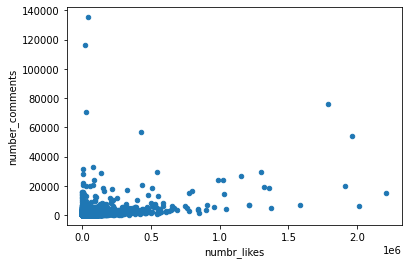

In [ ]:
ax = df_posts.plot.scatter('numbr_likes', 'number_comments')
ax.set_title("Number of likes vs number of comments")


In [ ]:
corr = df_posts['numbr_likes'].corr(df_posts["number_comments"])
print("Correlation between the number of likes and the number of comments is: ", round(corr, 2))

Correlation between the number of likes and the number of comments is:  0.41


##### **Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.**

To define if there is any significant relationship between two or more parameters, we will look at the correlation between parameters, which looks for a linear relationship between two parameters. We interpret the correlation as follows:

Complete correlation between two variables is a value of either + 1 or -1. Complete absence of correlation is represented by a value of 0. A moderate correlation is a correlation between 0.4-0.7. A higher correlation is a strong correlation.

First, we will convert the given dates to the hour in which a post is posted, since the changes are very slim that multiple posts are posted in the same minute. 
Next we will make a heatplot based on the correlation to see if there is any correlation between the parameters.


As we can see from the heatmap, there is no correlation between the number of likes and the hour in which a post is posted (0.0018), and there is also no correlation between the number of comments and the hour in which a post is posted (0.0011).




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


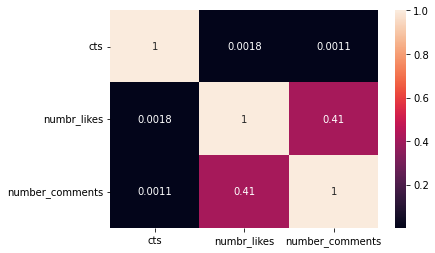

In [ ]:
# make a dataframe with only the needed columns
posts_corr = df_posts[["cts", "numbr_likes", "number_comments"]]

#Takes only the date_time column and extrapolate only hours 
posts_corr['cts'] = pd.to_datetime(posts_corr['cts'], unit='ns').dt.hour

sns.heatmap(posts_corr.corr(), annot = True)
plt.show()


##### **What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.**

First, we removed the rows that do not have any information regarding the number of followers. Second, we removed any outliers so we can plot the distribution. As can be seen in the plot, most of the users fall in the same bin, namely the first bin, that goes from 0 to approximately 300. 

If we look at the mean, we see that this falls in the first bin, which also explains why the first bin is so big. Even if we make the number of bins higher, we still see this phenomenon (unless you would make it really high, but this is not the idea of a histogram). If we look at the mode, we see a mode of 50, which is also really low and explains the same phenomenon. The reason why the mean is way higher than the mode, can be explained by the fact that there are some users with a large number of followers. You also see this back in the quantiles.

mode: 0    50.0
dtype: float64


count    3.380715e+06
mean     1.333294e+03
std      3.654137e+03
min      3.000000e+00
25%      1.630000e+02
50%      4.060000e+02
75%      9.560000e+02
max      4.531600e+04
Name: followers, dtype: float64

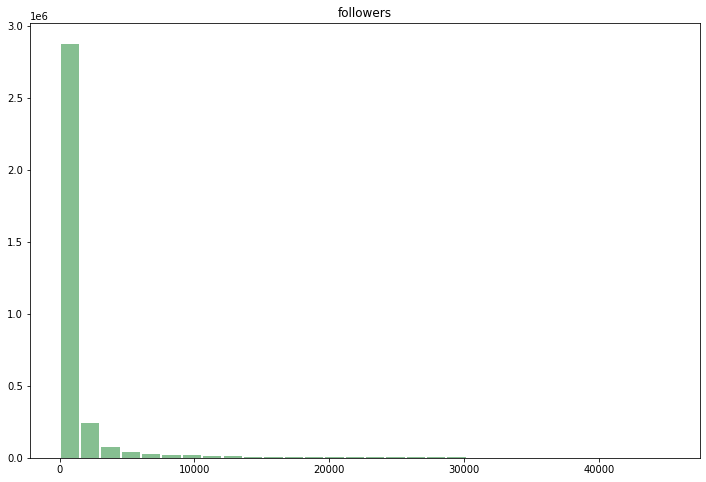

In [ ]:
from scipy import stats

# remove the rows with nan in followers
df_profiles_nfollowers = df_profiles.dropna( how='any',
                    subset=['followers'])

# remove outliers
q_low = df_profiles_nfollowers["followers"].quantile(0.01)
q_hi  = df_profiles_nfollowers["followers"].quantile(0.99)
df_filtered = df_profiles_nfollowers[(df_profiles_nfollowers["followers"] < q_hi) & (df_profiles_nfollowers["followers"] > q_low)]

df_filtered.hist(column='followers', bins=30, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

print("mode:", df_profiles_nfollowers['followers'].mode())
df_profiles_nfollowers['followers'].describe()


##### **What are histograms, bar plots, scatterplots and pie charts used for?**

**Histograms:**
A histogram shows the frequency of occurences of a parameter based on bins. You can use it for discrete or continuous data.

**Bar plots:**
A bar plot shows the relationship between numeric and categorical data. You can group different parameters together based on a certain category and show a comparison based on their values.

**Scatter plots:**
Scatter plots are used to show the relationship between two numerical/continuous parameters. The independent variable is plotted on the x-axis, while the dependenent variable is plotted on the y-axis. A scatter plot visualizes any correlation between the two parameters.

**Pie charts:**
A pie chart is used to show numerical proportions based on categories. Most of the time the percentage/ fraction of a proportion is displayed as well. 

##### **What insights can you extract from a Box Plot?**

With a boxplot, the variation of a certain parameter is visualised. a boxplot typically shows five main characteristics of the data:

*   The minimum
*   The maximum
*   The lower quartile
*   The upper quartile
*   The median

Sometimes it also displayes any outliers. Between the lower and upper quartile, the inter quartile range (IQR) is visible. 
Furthermore, the position of the median in the IQR also tells a lot about the skewness of the data. If the median is in the middle of the IQR, the data is symmetric. Otherwise, it is either left or right skewed. 



##**Algorithmic question**

***Algorithmic Question 1***

###What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result.

The algorithm scrolls the sequence starting from the 0 position to the end.
it fixes the 0 position and start to the 1 and so on, practically it starts from the end;
Fixed the all sequence's position since the third last, it reverses the last two, and print the the entire sequence with the input order and the sequence with the two last position swapped.
Now fixes all the positions since the fourth last, the third last position is swapped with the second last and do the same as before, but now it works with the last two values, that are the original third last and last.
Therefore the algorithm is doing all the possible disposition given a sequence, for this reason there will be *len(sequence) factorial* steps.

###What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

The algorithm doesn't care about the content of the sequence but only about its length, it is exactly a function of ***(N!)***

###Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

If I understand correctly the aim of the algorithm, which is to create a set of all the possible dispositions, it means that the length of the set is exactly ***N!*** so it can't be better.

###***Algorithmic question 2***

###Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

In [ ]:
def tagliaN(N):
    if  N <= 1 :                                            #  1
        return 0                                            # <= 1 
    elif N == 2:                                            #  1
        return 1                                            # <= 1
    elif N == 3:                                            #  1
        return 2                                            # <= 1
    else:                                                   #  1
        mas=0                                               # 1
        for n in range(2,N):                                # N-3
            mas=  max(mas, max(n*(N-n), n*tagliaN(N-n) ) )  # <= (N-2)* T(N-2) 
                
    return mas                                              # 1
tagliaN(int(input()))

10


36

###Show that the algorithm has exponential running time.

We can write the running time of this function in this way:


$T(N)=
\begin{cases}
C_1, & \text{if $N=0,1,2,3$,} \\
\sum_{i=2}^{N-1}T(N-i), & \text{Otherwise}
\end{cases}
$

$T(N)=\sum_{i=2}^{N-1}T(N-i)=T(N-2)+T(N-3)+ ... +T(N-(N-1))=$
$=T(N-2)+T(N-3)+ ... +T(1)$

$=T(N-1)+T(N-2)+T(N-3)+ ... +T(1)-T(N-1)$

If we look at the singol terms of the sum:

$T(N-1)=T(N-2)+T(N-3)+ ... T(1)- T(N-2)$

So we can write $T(N)$ as:

$T(N)=T(N-1)+[T(N-1)+T(N-2)]-T(N-1) $

$=T(N-1)+T(N-2)$

$=T(N-2)+ 2T(N-3)+T(n-4)$

$=T(N-3)+ 2^2T(N-4)+2T(n-5)$

$=T(N-4)+ 2^3T(N-5)+2^2T(n-6)+ 2T(N-7)$

$ ... $

$=T(3)+2^{N-1}T(2)+2^{N-2}T(1)+2^{N-3}T(0)+O(1)$

Where $T(0),T(1),T(2),T(3)$ are the base case so asymptotically to $O(1)$

$T(N)=O(1)+2^{N-1}O(1)+2^{N-2}O(1)+2^{N-3}O(1)=O(2^{N-1})$

###Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [ ]:
def taglio_polinomial(N):
    P = np.zeros(N+1)
    for i in range(1,N+1):
        mas = 0
        for j in range(1, i):
            mas = max(mas, (i-j)*j,  P[i-j]*j)
            P[i] = mas
    return int(P[N])
taglio_polinomial(int(input()))

10


36

$T(N)=C_1 +\sum_{i=1}^{N}\sum_{j=1}^{i}C_2$

$T(N)=O(1)+\sum_{i=1}^{N}\sum_{j=1}^{i}O(1)$

$T(N)=O(1)+\sum_{i=1}^{N}(i-0+1)O(1)$

$T(N)=O(1)+\sum_{i=1}^{N}(i+1)O(1)$

$T(N)=O(1)+\sum_{i=1}^{N}(i+1)O(1)$

Since $1 \leq i \leq N$ we can consider $i+1=O(N)$ then:

$T(N)=O(1)+\sum_{i=1}^{N}O(N)O(1)$

$=O(1)+\sum_{i=1}^{N}O(N)$

$T(N)= O(1)+ (N-1+1)O(N)$

$T(N)= O(1)+ O(N)O(N)= O(N^2)$

###Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

In [ ]:
import time
start1 = time.time()
for N in range(2,26):
    tagliaN(N)
end1 = time.time()
delta_time1= end1 - start1
print(f"Execution time of the recursive function tagliaN() is: {round(delta_time1,5)*1000} milliseconds")

Execution time of the recursive function tagliaN() is: 90.47 milliseconds


In [ ]:
start2 = time.time()
for N in range(2,26):
    taglio_polinomial(N)
end2 = time.time()
delta_time2= end2 - start2
print(f"Execution time of the polinomial function taglio_polinomial() is: {round(delta_time2,5)*1000} milliseconds")

Execution time of the polinomial function taglio_polinomial() is: 4.67 milliseconds


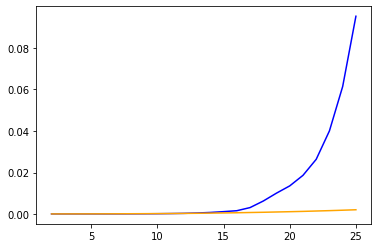

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

r = range(2, 26)
start_rec = time.time()
dt_rec = []
for N in r: 
    tagliaN(N)
    dt_rec.append(time.time()-start_rec)
plt.plot(r, dt_rec, color="blue")

start_pol = time.time()
dt_pol = []
for N in r: 
    taglio_polinomial(N)
    dt_pol.append(time.time()-start_pol)
plt.plot(r, dt_pol, color="orange")

###(Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

We implemented two different version of this algorithm:

the idea of this algorithm is based on a lateral observation. Mainly the polinomyal version of the algorithm build a vector where for each index $i$ we have the solution for a ribbon with length $i$.
So I decided to focus on studying that sequence of numbers. I decomposed each element of the sequence in a product of prime numbers, and I observed that every member is a product of $2^m$ and $3^n$ where $m \in \left \{ 0,1,2 \right\}$ and $n$ is integer positive number and increase every 3 number.

Therefore in the first version i build the same vector than the polynomial algorithm but in a easier way.
After that I observed that I only need the last position of the vector and I write the exponents $m$, $n$ in a different way: $m$ is the remainder of the division of the index (the lenght of the ribbon) by three, and $n$ is the whole part of the same division.

In [ ]:
def cut(N):
    C=np.zeros(N)
    C[0]=1
    C[1]=2
    f=0
    g=2
    h=1
    for i in range(1,N-1):
        
        if i%3 == 0:
            C[i+1]=3**(g)
            g+=1
        elif (i-1)%3 == 0:
            C[i+1]=4*(3**(f))
            f+=1
        elif (i-2)%3 == 0:
            C[i+1]=2*(3**(h))
            h+=1
            
    return C[N-2]

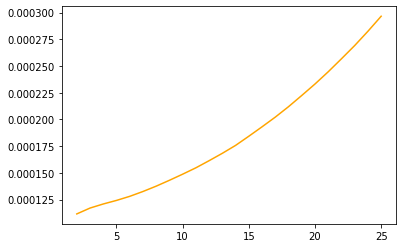

In [ ]:
start_cut = time.time()
dt_cut = []
for N in r: 
    cut(N)
    dt_cut.append(time.time()-start_cut)
plt.plot(r, dt_cut, color="orange")

In [ ]:
start_cut = time.time()
for N in range(2,26):
    cut(N)
end_cut = time.time()
delta_time_cut= end_cut - start_cut
print(f"Execution time of the polinomial function taglio_polinom() is: {round(delta_time2,5)*1000} milliseconds")

Execution time of the polinomial function taglio_polinom() is: 4.67 milliseconds


In [ ]:
def cut_better(N):
    if N <= 1:
        return 0
    elif N == 2:
        return 1
    elif N == 3:
        return 2
    else:
        if N%3 == 0:
            M=3**(N//3)
        
        elif (N-1)%3 == 0:
            M=4*(3**(N//3 -1))
        
        elif (N-2)%3 == 0:
            M=2*(3**(N//3))
            
    return M

cut_better(int(input()))

25


8748

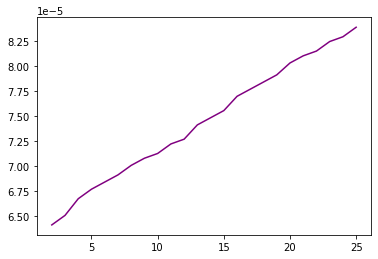

In [ ]:
start_cutB = time.time()
dt_cutB = []
for N in r: 
    cut_better(N)
    dt_cutB.append(time.time()-start_cutB)
plt.plot(r, dt_cutB, color="purple")

In [ ]:
start4 = time.time()
for N in range(2,26):
    cut_better(N)
end4 = time.time()
delta_time4= end4 - start4
print(f"Execution time of the function cut_better() is: {round(delta_time4,5)*1000} milliseconds")

Execution time of the function cut_better() is: 0.12000000000000001 milliseconds
